## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Preprocessing](#section3)
4. [Logistic Regression](#section4)<br>
    - 4.1 [Preparing X and y using pandas](#section401)<br>
    - 4.2 [Splitting X and y into training and test datasets.](#section402)<br>
    - 4.3 [Logistic regression in scikit-learn](#section403)<br>
    - 4.4 [Using the Model for Prediction](#section404)<br>
5. [Model evaluation](#section5)<br>
    - 5.1 [Model Evaluation using accuracy classification score](#section501)<br>
    - 5.2 [Model Evaluation using confusion matrix](#section502)<br> 
6. [Decision Tree Classifier](#section6)<br>
    - 5.1 [Model Evaluation using accuracy classification score](#section601)<br>
    - 5.2 [Model Evaluation using confusion matrix](#section602)<br> 
7. [Random Forest Classifier](#section7)<br>
    - 5.1 [Model Evaluation using accuracy classification score](#section701)<br>
    - 5.2 [Model Evaluation using confusion matrix](#section702)<br> 

<a id=section1></a>

## 1. Problem Statement

The objective is to __predict__  if a member of the team would go on to win the __man of the match__ based on the statistics of the __FIFA 2018__ dataset         

<a id=section2></a>

## 2. Data Loading and Description

__Importing Packages__

In [1]:
import pandas as pd
import seaborn as sns
import pandas_profiling
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from sklearn import metrics
from subprocess import check_output

import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline
sns.set()

### Loading the data set

In [2]:
fifa=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/FIFA%202018%20Statistics.csv")
fifa.head(100)

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,28-06-2018,Belgium,England,1,52,15,4,4,7,2,...,2,0,0,Yes,51.0,Group Stage,No,0,NaN,NaN
96,30-06-2018,France,Argentina,4,41,9,4,4,1,0,...,3,0,0,Yes,13.0,Round of 16,No,0,NaN,NaN
97,30-06-2018,Argentina,France,3,59,9,4,1,4,4,...,5,0,0,No,41.0,Round of 16,No,0,NaN,NaN
98,30-06-2018,Uruguay,Portugal,2,39,6,3,2,1,2,...,0,0,0,Yes,7.0,Round of 16,No,0,NaN,NaN


- This dataset contains match statistics about which player has won the **Man of the Match** from the **FIFA** world cup **2018**

### Description of the dataset

| Column Name            | Description                                                                                   |
| -------------          |:-------------                                                                                :| 
| Date                   | Match Date                                                                                    | 
| Team                   | Playing Team  		                                                                 |  
| Opponent		 | Opponent Team				                                                 | 
| Goal Scored            | Goals scored by the Team   									 |   
| Ball Possession %      | Amount of time ball was in control by the team                                                | 
| Attempts		 | Number of attempts to score goal                                                              |  
| On-Target		 | Number of shots on-target			                                                 | 
| Off-Target             | Number of shots that went off-target								 |   
| Blocked                | Number of opponent team's attempts blocked by the team                                        | 
| Corners		 | Number of corner shots used	                                                                 |  
| Offsides		 | Number of Off-side events			                                                 | 
| Goal ScoredFree Kicks  | Number of free-kicks used   									 |   
| Saves	                 | Number of saves by the goal keeper		                                                 | 
| Pass Accuracy %	 | Percentage of passes that reached the same team player as aimed                               |  
| Passes		 | Total number of passes by the team		                                                 | 
| Distance Covered (Kms) | Total distance covered by the team members in this game					 |   
| Fouls Committed        | Number of fouls committed by the team members                                                 | 
| Yellow Card		 | Number of Yellow warning received                                                             |  
| Yellow & Red		 | Number of Yellow & Red warning received	                                                 | 
| Red		         | Number of Red cards received									 |   
| Man of the Match       | Did this team member win Man of the Match?	                                                 | 
| 1st Goal		 | When did the team score the 1st goal?                                                         |  
| Round			 | Stage of the match				                                                 | 
| PSO      		 | Was there a penalty shootout (PSO) in this match?						 |   
| Goals in PSO           | Number of goals scored in the Penalty shootout                                                | 
| Own goals		 | Number of own goals 		                                                                 |  
| Own goal Time		 | When did the team score own goal?		                                                 | 


In [3]:
fifa.shape

(128, 27)

- There are **128** rows and **27** columns in this dataset

In [4]:
fifa.columns

Index(['Date', 'Team', 'Opponent', 'Goal Scored', 'Ball Possession %',
       'Attempts', 'On-Target', 'Off-Target', 'Blocked', 'Corners', 'Offsides',
       'Free Kicks', 'Saves', 'Pass Accuracy %', 'Passes',
       'Distance Covered (Kms)', 'Fouls Committed', 'Yellow Card',
       'Yellow & Red', 'Red', 'Man of the Match', '1st Goal', 'Round', 'PSO',
       'Goals in PSO', 'Own goals', 'Own goal Time'],
      dtype='object')

##  Exploratory Data Analysis

In [5]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 27 columns):
Date                      128 non-null object
Team                      128 non-null object
Opponent                  128 non-null object
Goal Scored               128 non-null int64
Ball Possession %         128 non-null int64
Attempts                  128 non-null int64
On-Target                 128 non-null int64
Off-Target                128 non-null int64
Blocked                   128 non-null int64
Corners                   128 non-null int64
Offsides                  128 non-null int64
Free Kicks                128 non-null int64
Saves                     128 non-null int64
Pass Accuracy %           128 non-null int64
Passes                    128 non-null int64
Distance Covered (Kms)    128 non-null int64
Fouls Committed           128 non-null int64
Yellow Card               128 non-null int64
Yellow & Red              128 non-null int64
Red                       128 non-nul

- The columns **1st Goal,Own goals,Own goal time** have **missing** values

In [6]:
fifa.describe()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,1st Goal,Goals in PSO,Own goals,Own goal Time
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,94.000000,128.000000,12.0,12.000000
mean,1.320312,49.992188,12.593750,3.914062,5.273438,3.359375,4.718750,1.343750,14.890625,2.726562,...,462.648438,106.664062,13.546875,1.695312,0.015625,0.015625,39.457447,0.203125,1.0,45.833333
std,1.156519,10.444074,5.245827,2.234403,2.409675,2.403195,2.446072,1.193404,4.724262,2.049447,...,151.186311,11.749537,4.619131,1.325454,0.124507,0.124507,24.496506,0.807049,0.0,29.978275
min,0.000000,25.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,...,189.000000,80.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,12.000000
25%,0.000000,42.000000,9.000000,2.000000,4.000000,1.750000,3.000000,0.000000,11.000000,1.000000,...,351.000000,101.000000,10.000000,1.000000,0.000000,0.000000,18.250000,0.000000,1.0,21.750000
50%,1.000000,50.000000,12.000000,3.500000,5.000000,3.000000,5.000000,1.000000,15.000000,2.000000,...,462.000000,104.500000,13.000000,2.000000,0.000000,0.000000,39.000000,0.000000,1.0,35.000000
75%,2.000000,58.000000,15.000000,5.000000,7.000000,4.000000,6.000000,2.000000,18.000000,4.000000,...,555.250000,109.000000,16.000000,2.000000,0.000000,0.000000,54.750000,0.000000,1.0,75.750000
max,6.000000,75.000000,26.000000,12.000000,11.000000,10.000000,11.000000,5.000000,26.000000,9.000000,...,1137.000000,148.000000,25.000000,6.000000,1.000000,1.000000,90.000000,4.000000,1.0,90.000000


- Maximum **Goals** scored is **6** 
- Maximum of **4** goals are scored in Penalty Shoot Out
- The column **Red** and **Yellow & Red** has values **0** or **1**
- **Yellow card** has a maximum value of **6**

In [7]:
fifa.isnull().sum()

Date                        0
Team                        0
Opponent                    0
Goal Scored                 0
Ball Possession %           0
Attempts                    0
On-Target                   0
Off-Target                  0
Blocked                     0
Corners                     0
Offsides                    0
Free Kicks                  0
Saves                       0
Pass Accuracy %             0
Passes                      0
Distance Covered (Kms)      0
Fouls Committed             0
Yellow Card                 0
Yellow & Red                0
Red                         0
Man of the Match            0
1st Goal                   34
Round                       0
PSO                         0
Goals in PSO                0
Own goals                 116
Own goal Time             116
dtype: int64

<a id=section1></a>

## 3. Preprocessing the data

- **1st goal** has **34** missing values
- **own goals and own goal time** has **116** missing values which is **90 percent** of the total value
- Not always does a team score its own goals i.e considering that these are **Missing not at Random**,replacing the **Own Goals and Own Goal time** as **0**
- **1st goal** will be captured only for teams that have goals scored against them but there are **33 '0' values** for the goal scored and hence we will replace the **34** missing values in the **1st goal** as **0**



In [8]:
fifa.fillna(0,inplace=True)

- Converting the **Date** column to **date time**

In [9]:
fifa['Date']=pd.to_datetime(fifa['Date'])

In [10]:
fifa.head(50)

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,2018-06-14,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,0.0,0.0
1,2018-06-14,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,0.0,Group Stage,No,0,0.0,0.0
2,2018-06-15,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,0.0,Group Stage,No,0,0.0,0.0
3,2018-06-15,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,0.0,0.0
4,2018-06-15,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,0.0,Group Stage,No,0,1.0,90.0
5,2018-06-15,Iran,Morocco,1,36,8,2,5,1,2,...,3,0,0,Yes,90.0,Group Stage,No,0,0.0,0.0
6,2018-06-15,Portugal,Spain,3,39,8,3,2,3,4,...,1,0,0,No,4.0,Group Stage,No,0,0.0,0.0
7,2018-06-15,Spain,Portugal,3,61,12,5,5,2,5,...,1,0,0,Yes,24.0,Group Stage,No,0,0.0,0.0
8,2018-06-16,France,Australia,2,51,12,5,4,3,5,...,1,0,0,Yes,58.0,Group Stage,No,0,0.0,0.0
9,2018-06-16,Australia,France,1,49,4,1,2,1,1,...,3,0,0,No,62.0,Group Stage,No,0,1.0,81.0


### Using countplot to find the count of Man of Match 

Text(0.5, 1.0, 'Count of the Man of the Match of fifa')

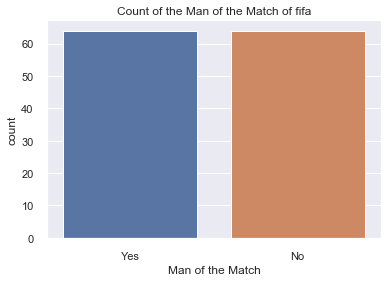

In [11]:
sns.countplot(x='Man of the Match',data=fifa).set_title('Count of the Man of the Match of fifa')

- There are equal no of players who won the **Man of the Match** and who did not **win**

In [12]:
fifa.groupby(['Man of the Match'])['Man of the Match'].count()

Man of the Match
No     64
Yes    64
Name: Man of the Match, dtype: int64

### Verifying the impact of the **Goals Scored** on the **Man of the Match**

Text(0.5, 1, 'Impact of Goals Scored on the Man of the Match')

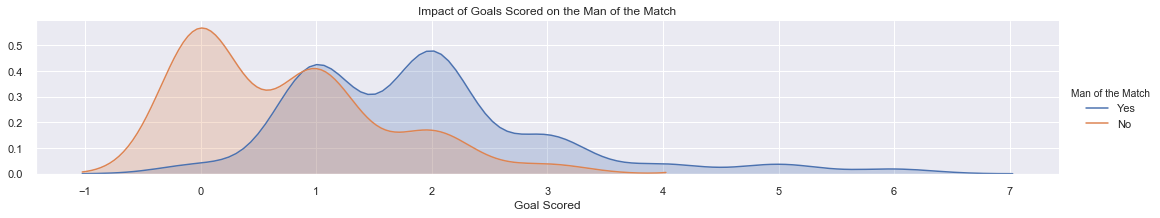

In [13]:
as_Fig=sns.FacetGrid(fifa,hue='Man of the Match',aspect=5)
as_Fig.map(sns.kdeplot,'Goal Scored',shade=True)
as_Fig.add_legend()
plt.title('Impact of Goals Scored on the Man of the Match') 

- **Higher** the no of goals scored **higher** the chances of winning  **Man of Match** 

### Using the pair plot to understand the joint relationship of a few features

Text(0.5, 1, 'Pair Plot to show the relationship')

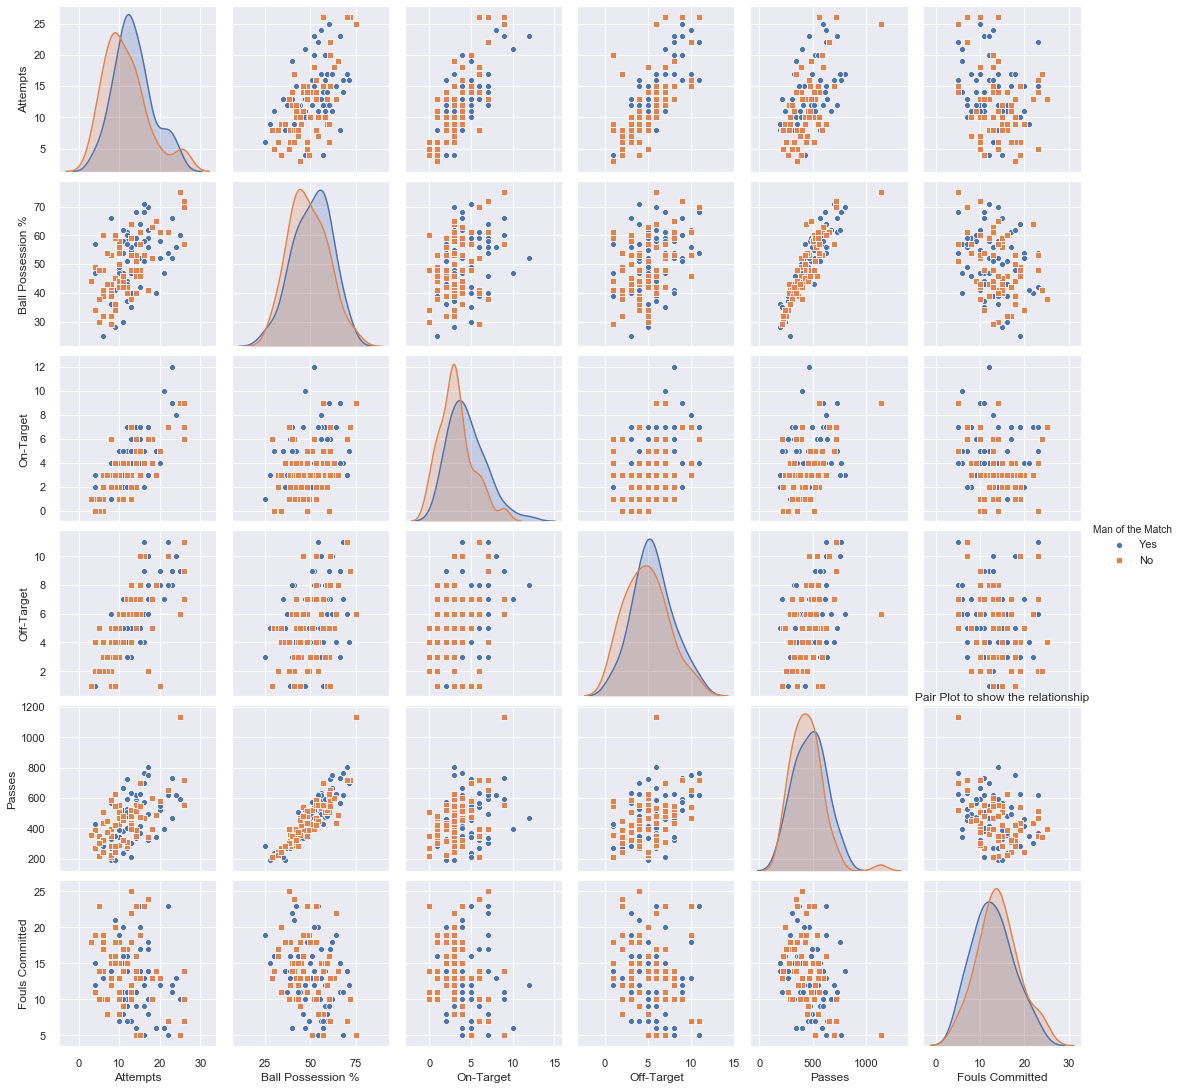

In [14]:
sns.pairplot(fifa[["Attempts","Ball Possession %","On-Target","Off-Target","Man of the Match","Passes","Fouls Committed"]],vars = ["Attempts","Ball Possession %","On-Target","Off-Target","Passes","Fouls Committed"],hue="Man of the Match", dropna=True,markers=["o", "s"])
plt.title('Pair Plot to show the relationship')

- When the number of **Attempts** to score goal is above **25** the team has gone to win the **Man of the Match**
- When the **Fouls committed** is more then chances of winning **Man of the Match** reduces
- When **Passes** are more the chance of winning **Man of the Match** is slightly higher
- When the **Off-Target** value is at **5** then the chances of winning **Man of the Match** is higher

### Does the number of saves impact the Man of the Match

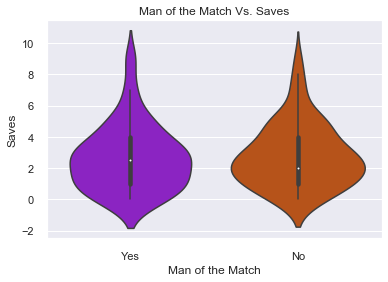

In [15]:
sns.violinplot(x="Man of the Match",y="Saves",palette="gnuplot",data = fifa)
plt.title("Man of the Match Vs. Saves")
plt.show()


- There is minimal impact that **Saves** by the goalkeeper creates to the **Man of the Match**

### Using pairplot to understand the relationship between the other features

Text(0.5, 1, 'Pair Plot to show the relationship')

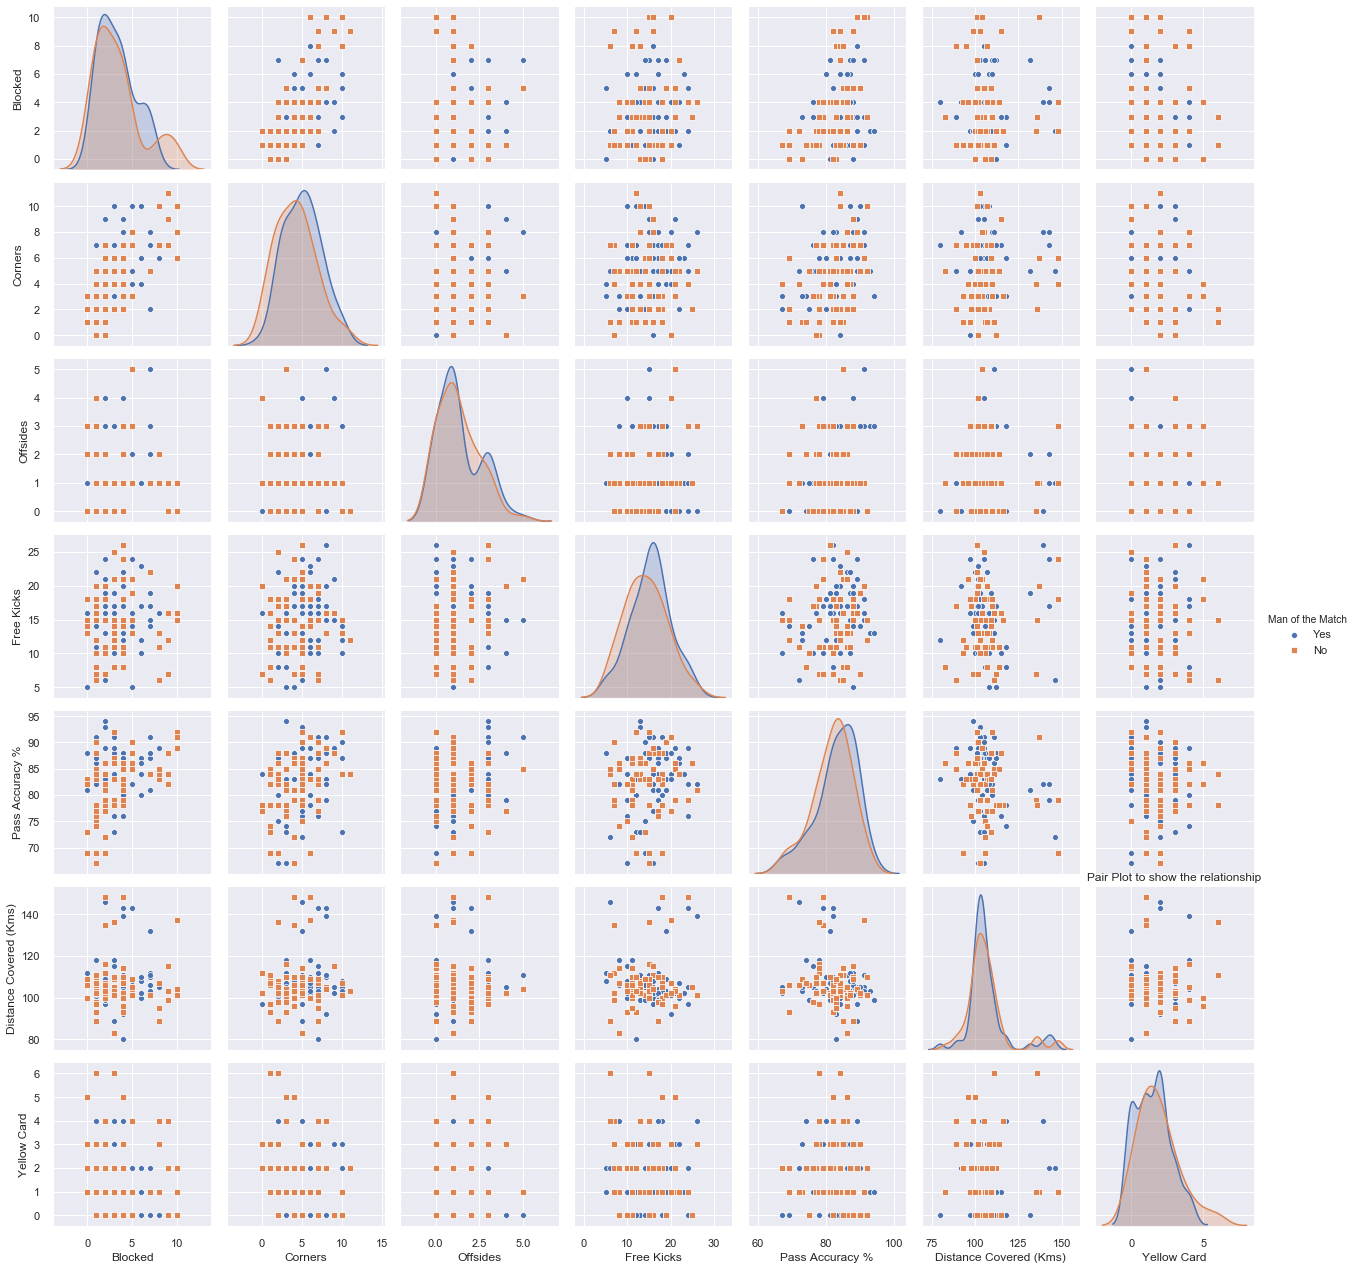

In [16]:
sns.pairplot(fifa[["Blocked","Corners","Offsides","Free Kicks","Pass Accuracy %","Distance Covered (Kms)","Yellow Card","Man of the Match"]],vars = ["Blocked","Corners","Offsides","Free Kicks","Pass Accuracy %","Distance Covered (Kms)","Yellow Card"],hue="Man of the Match", dropna=True,markers=["o", "s"])
plt.title('Pair Plot to show the relationship')

- When the team has more **corners** the chances of **Man of the Match** is high
- When the **Free kicks** are around **15** the team has more chances of **Man of the Match**
- When the **Distance covered (kms)** is **100** the chance to win **Man of the Match** is more
- When the **Pass Accuracy %** improves the chances of winning **Man of the Match** improves
- The team with more **Yellow cards** seem to have less chances of winning the **Man of the Match**


### Let us check the impact of 1st Goal with Man of the Match

Text(0.5, 1, 'Impact of 1st Goal Scored on the Man of the Match')

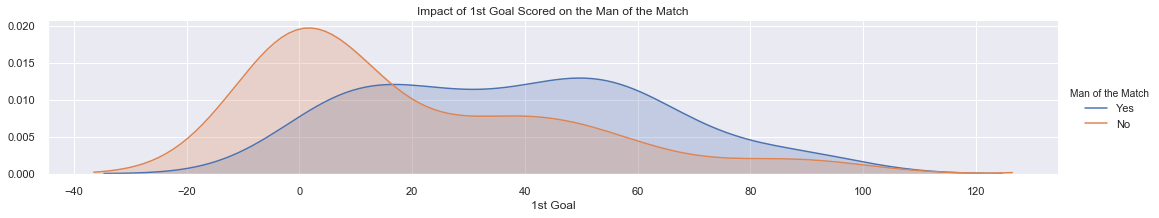

In [17]:
as_Fig=sns.FacetGrid(fifa,hue='Man of the Match',aspect=5)
as_Fig.map(sns.kdeplot,'1st Goal',shade=True)
as_Fig.add_legend()
plt.title('Impact of 1st Goal Scored on the Man of the Match') 

- The team that scored the 1st Goal at the **beginning** of the Match had less chance of winning the **Man of the Match**
- The team that scored their 1st goal in the range of **20 to 100** has more chance of winning the **Man of the Match**

### Impact of Round on the Man of the Match

Text(0.5, 1.0, 'Survived and not survived count each year')

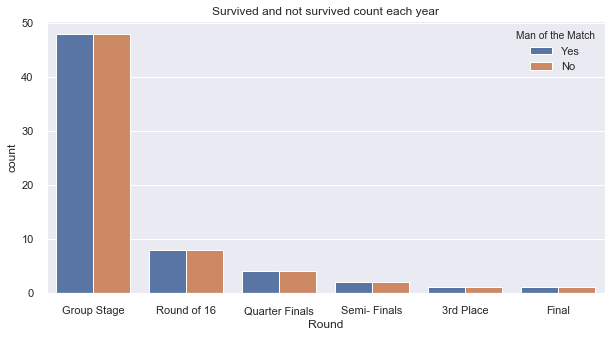

In [18]:
plt.figure(figsize=(10,5))
sns.countplot('Round',data=fifa,hue='Man of the Match')
plt.title("Survived and not survived count each year")

- As expected the count of **Man of the Match** during **Group stage** is higher as goes down as it progress since the no of matches is expected to decrease towards the final stages
- An interesting observation however is the equal no of **Man of Match** possibilites at each stage

### Impact of Red card on Man of the Match

Text(0.5, 1.0, 'Impact of the Red card on Man of the Match')

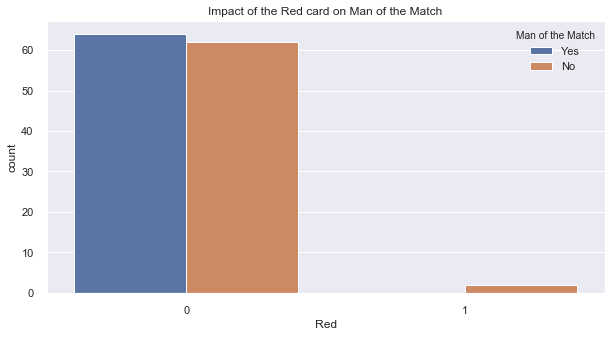

In [19]:
plt.figure(figsize=(10,5))
sns.countplot('Red',data=fifa,hue='Man of the Match')
plt.title("Impact of the Red card on Man of the Match")

- The team that has not received a **Red** card has gone on to win the **Man of the Match**
- The team that has received the **Red card** did not win the **Man of the Match**

### Understanding the impact of Own goals on Man of the Match

Text(0.5, 1.0, 'Impact of the Own goals on Man of the Match')

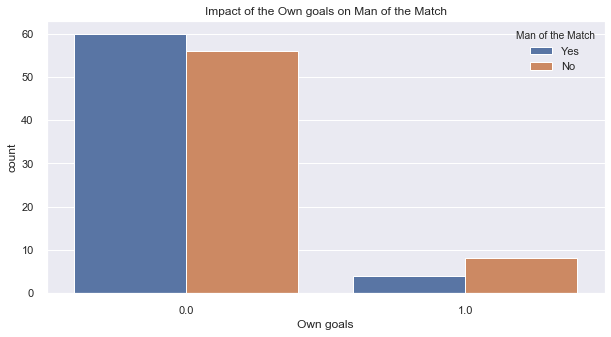

In [20]:
plt.figure(figsize=(10,5))
sns.countplot('Own goals',data=fifa,hue='Man of the Match')
plt.title("Impact of the Own goals on Man of the Match")

- There are less number of teams that scored its **own goals**
- The teams that scored **Own goals** had more chances of not winning the **Man of the Match** however the teams that scored their **Own goals** have also won the **Man of the Match**

- Dropping the **date** column as it is not going to be a deciding factor for the **Man of the Match** prediction

In [21]:
fifa.drop(['Date'],axis=1,inplace=True)

### Dividing dataset into two, on the basis of categorical and numerical.

In [22]:
fifa_cat=fifa[['Team', 'Opponent','Round','PSO','Man of the Match']]
fifa_cont=fifa.drop(['Team', 'Opponent','Round','PSO','Man of the Match'],axis=1)
fifa_cont.head()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,1st Goal,Goals in PSO,Own goals,Own goal Time
0,5,40,13,7,3,3,6,3,11,0,...,306,118,22,0,0,0,12.0,0,0.0,0.0
1,0,60,6,0,3,3,2,1,25,2,...,511,105,10,0,0,0,0.0,0,0.0,0.0
2,0,43,8,3,3,2,0,1,7,3,...,395,112,12,2,0,0,0.0,0,0.0,0.0
3,1,57,14,4,6,4,5,1,13,3,...,589,111,6,0,0,0,89.0,0,0.0,0.0
4,0,64,13,3,6,4,5,0,14,2,...,433,101,22,1,0,0,0.0,0,1.0,90.0


In [23]:
fifa['Man of the Match']=fifa['Man of the Match'].map({'Yes':1,'No':0})

- Verifying the **correlation**

Text(0.5, 1, 'Correlation between features')

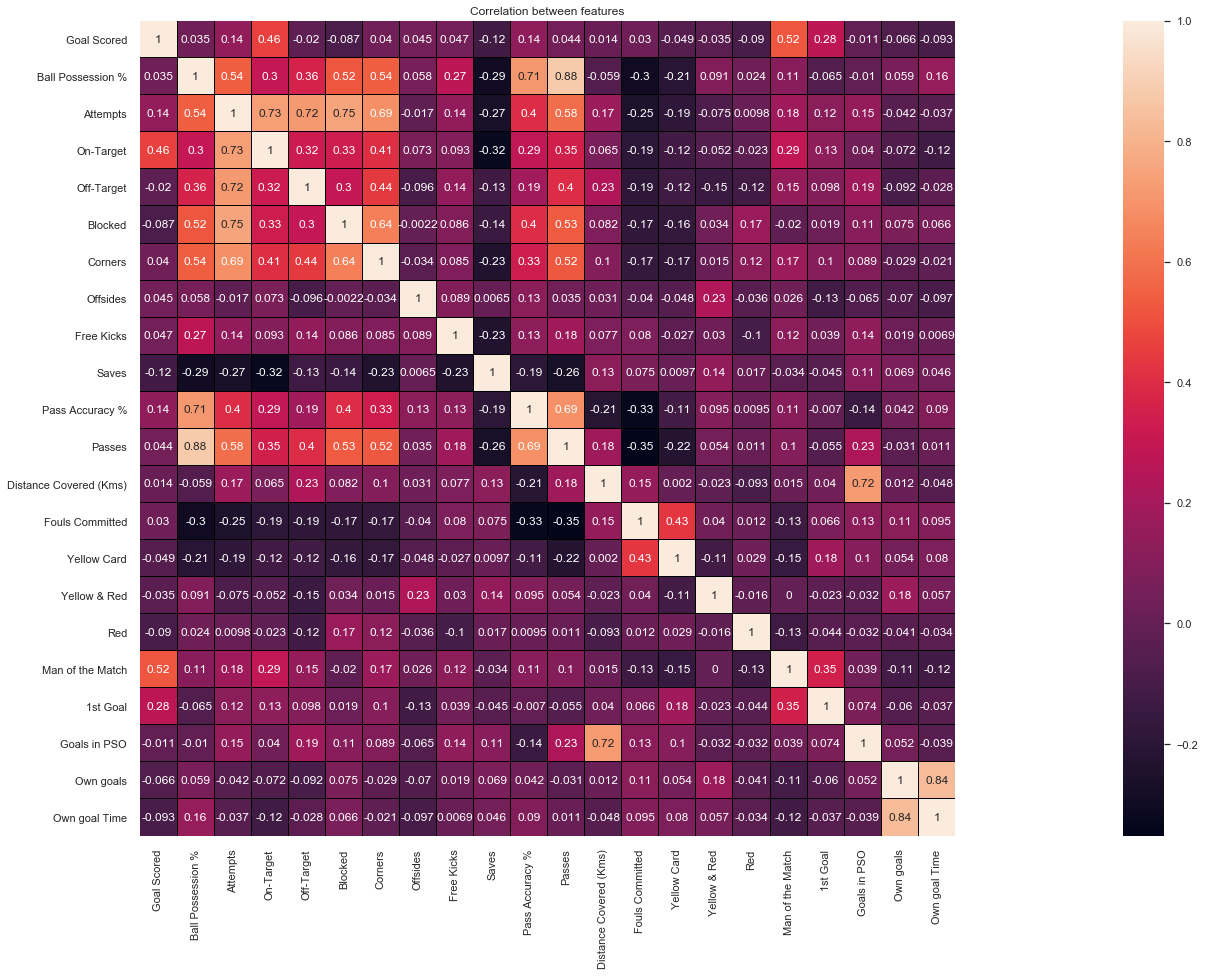

In [24]:
corr =fifa.corr()
plt.figure(figsize=(60,15))
sns.heatmap(corr,linewidth=.01, square = True, annot = True,linecolor ='black')
plt.title('Correlation between features')

- **Man of the Match** is highly correlated with the **Goals Scored**
- **Man of the Match** is negatively correlated with **Own goals,Own goal Time,Fouls committed,Yellow Card,Red,Saves,Blocked**
- **Ball Possession%** and **Passes** are highly correlated
- **Attempts** is highly correlated with **On-Target,Off-Target,Corners and Blocked**
- **Own goal** and **Own goal time** are highly correlated
- **Goals in PSO** and **Distance covered(Kms)** are highly correlated

## Inferences from EDA

- The count of number of teams who won the **Man of the Match** is equal with the number of teams who did not win the **Man of the Match**
- **Higher** the number of goals scored **Higher** is the chances of winning the **Man of the Match** for that team member
- **Attempts**,**Corners**,**Pass accuracy %** and **Passess** when more the chances of winning **Man of the Match** is high for that team
- **Saves** by goalkeeper has minimal impact on the **Man of the Match** for the team
- The team with more **Yellow cards** has less chances of its team member winning the **Man of the Match**
- The team that scored the 1st Goal at the **beginning** of the Match had less chance for its team member to win the **Man of the Match**
- The members of team that scored their 1st goal in the range of **20 to 100** has more chance of winning the **Man of the Match**
- The members of team with **Red card** did not go on to win the **Man of the Match**
- The member of a team that had scored its **Own goal** has less chance of **Man of the Match** however teams have also won **Man of the Match** when scoring Own goals
- The **Round** does not impact the **Man of the Match**


## Feature Engineering

- Dealing with **Multicollinearity**
- **Own goal time** and **Own goals** are highly correlated and **Own goal time** may not be a deciding factor on the **Man of the Match** predictions and hence dropping this column
- **Ball Possession %** and **Passess** are highly correlated and lets remove **Passess** 

In [25]:
fifa.drop(['Own goal Time','Passes'],axis=1,inplace=True)
fifa.head(100)

,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,...,Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals
0,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,...,22,0,0,0,1,12.0,Group Stage,No,0,0.0
1,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,...,10,0,0,0,0,0.0,Group Stage,No,0,0.0
2,Egypt,Uruguay,0,43,8,3,3,2,0,1,...,12,2,0,0,0,0.0,Group Stage,No,0,0.0
3,Uruguay,Egypt,1,57,14,4,6,4,5,1,...,6,0,0,0,1,89.0,Group Stage,No,0,0.0
4,Morocco,Iran,0,64,13,3,6,4,5,0,...,22,1,0,0,0,0.0,Group Stage,No,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Belgium,England,1,52,15,4,4,7,2,1,...,14,2,0,0,1,51.0,Group Stage,No,0,0.0
96,France,Argentina,4,41,9,4,4,1,0,0,...,21,3,0,0,1,13.0,Round of 16,No,0,0.0
97,Argentina,France,3,59,9,4,1,4,4,1,...,15,5,0,0,0,41.0,Round of 16,No,0,0.0
98,Uruguay,Portugal,2,39,6,3,2,1,2,0,...,13,0,0,0,1,7.0,Round of 16,No,0,0.0


## Checking for outliers

- Verifying the **Outliers** for the correlated columns

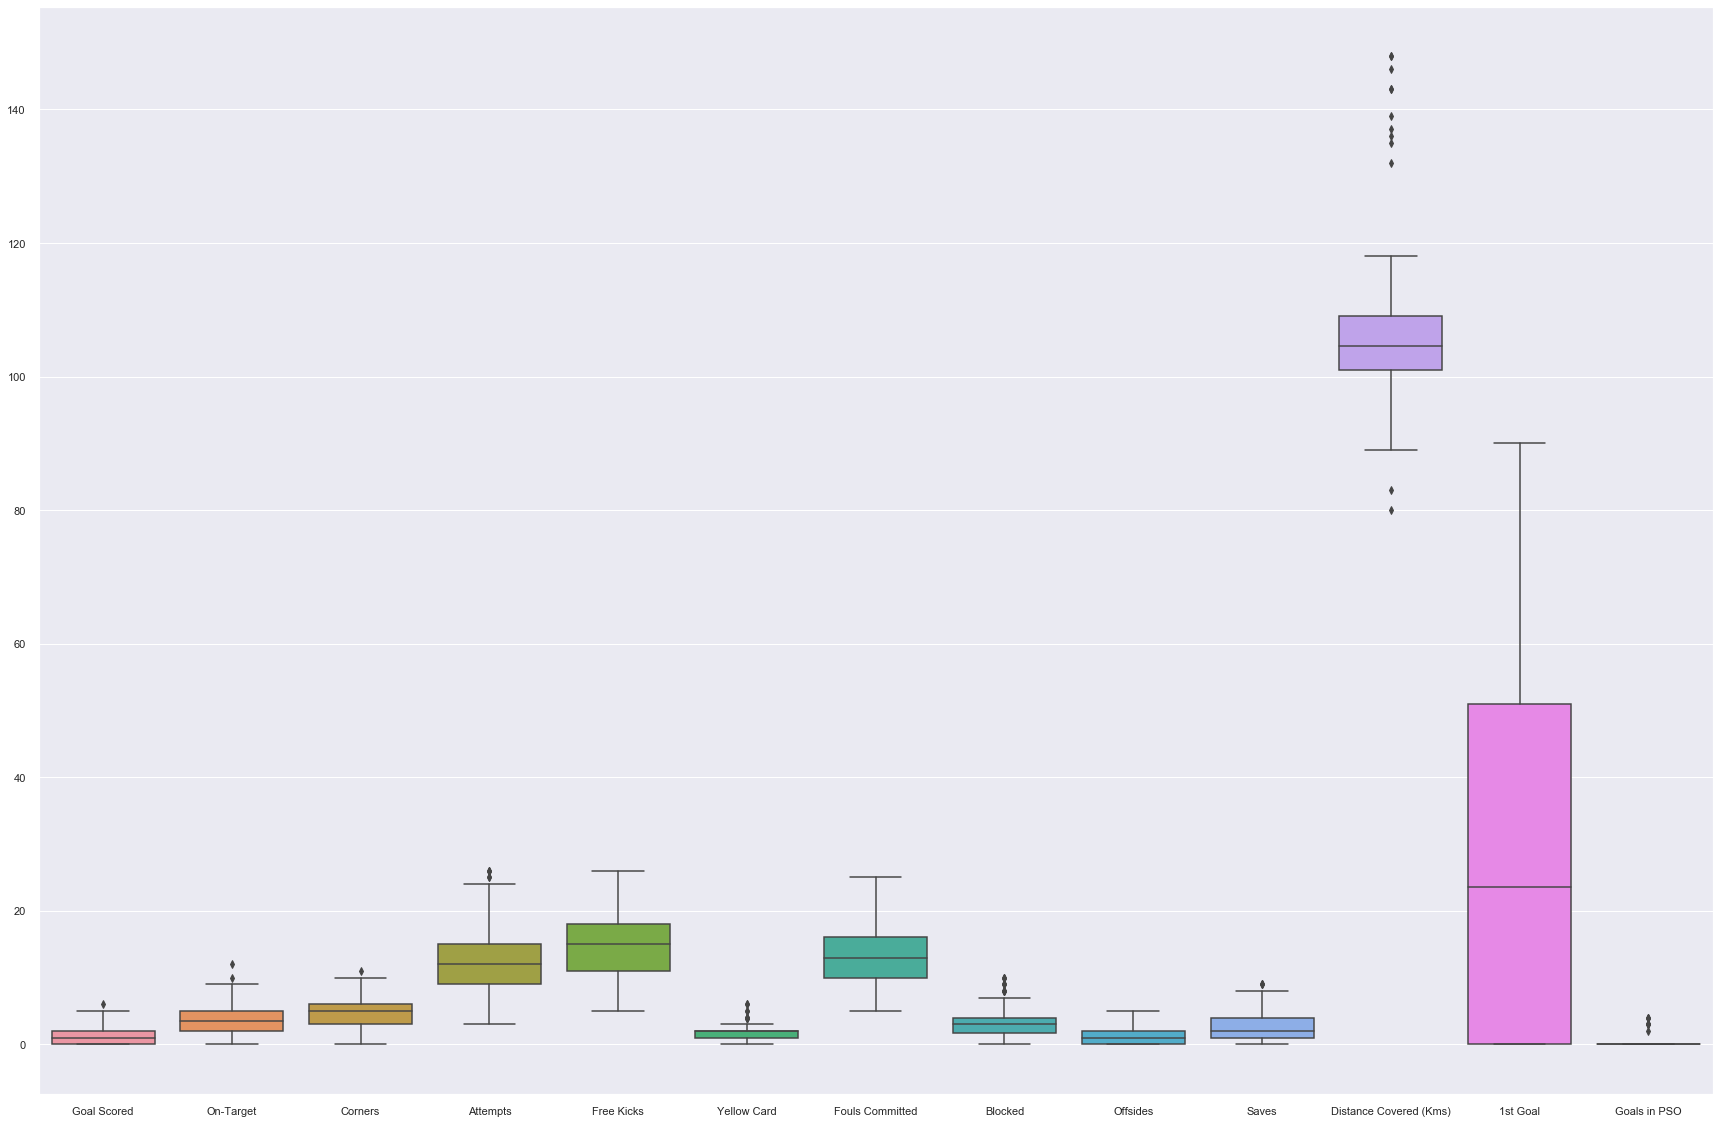

In [26]:
var = ['Goal Scored', 'On-Target', 'Corners', 'Attempts', 'Free Kicks', 'Yellow Card',  
       'Fouls Committed','Blocked','Offsides','Saves','Distance Covered (Kms)','1st Goal','Goals in PSO']
dummy_data = fifa[var]
plt.figure(figsize=(30,20))
sns.boxplot(data = dummy_data)
plt.show()

- The **outliers** doesn't seem to affect the data much and hence can be used
- However **Distance covered (Kms)** has a few outlier data lets remove that

In [27]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 
    lower_bound = df_in[col_name].min()
    upper_bound = q3+1.5*iqr
    print('Column',col_name,'IQR lower bound and upper bound are', lower_bound, 'and', upper_bound, 'respectively')
    df_out = df_in.loc[(df_in[col_name] > lower_bound) & (df_in[col_name] < upper_bound)]
    return df_out

### Removing the outliers in the Distance Covered(Kms) 

In [28]:
def log(fifa):
    return remove_outlier(fifa, 'Distance Covered (Kms)')
fifa = log(fifa) 

Column Distance Covered (Kms) IQR lower bound and upper bound are 80 and 121.0 respectively


### Checking for unique values

In [29]:
fifa['PSO'].unique()

array(['No'], dtype=object)

In [30]:
fifa['Round'].unique()

array(['Group Stage', 'Round of 16', 'Quarter Finals', 'Semi- Finals',
       '3rd Place', 'Final'], dtype=object)

In [31]:
fifa['Team'].unique()

array(['Russia', 'Saudi Arabia', 'Egypt', 'Uruguay', 'Morocco', 'Iran',
       'Portugal', 'Spain', 'France', 'Australia', 'Argentina', 'Iceland',
       'Peru', 'Denmark', 'Croatia', 'Nigeria', 'Costa Rica', 'Serbia',
       'Germany', 'Mexico', 'Brazil', 'Switzerland', 'Sweden',
       'Korea Republic', 'Belgium', 'Panama', 'Tunisia', 'England',
       'Colombia', 'Japan', 'Poland', 'Senegal'], dtype=object)

## Label Encoding the categorical columns

In [32]:
def log(fifa_cat):
    from sklearn.preprocessing import LabelEncoder
    return fifa_cat.apply(LabelEncoder().fit_transform)
fifa_cat = log(fifa_cat)

- Combining the **numerical** and **categorical** features

In [33]:
fifa_final=pd.concat([fifa_cat,fifa_cont],axis=1)
fifa_final.head()

,Team,Opponent,Round,PSO,Man of the Match,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,...,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,1st Goal,Goals in PSO,Own goals,Own goal Time
0,23,24,2,0,1,5,40,13,7,3,...,306,118,22,0,0,0,12.0,0,0.0,0.0
1,24,23,2,0,0,0,60,6,0,3,...,511,105,10,0,0,0,0.0,0,0.0,0.0
2,8,31,2,0,0,0,43,8,3,3,...,395,112,12,2,0,0,0.0,0,0.0,0.0
3,31,8,2,0,1,1,57,14,4,6,...,589,111,6,0,0,0,89.0,0,0.0,0.0
4,17,13,2,0,0,0,64,13,3,6,...,433,101,22,1,0,0,0.0,0,1.0,90.0


<a id=section4></a>

## Logistic Regression

<a id=section401></a>

## 4.1 Preparing X and y using pandas

In [34]:
X=pd.DataFrame()
def log():
    X=fifa_final.loc[:,fifa_final.columns != 'Man of the Match']
    return X
X = log()

In [35]:
X.head()

,Team,Opponent,Round,PSO,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,...,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,1st Goal,Goals in PSO,Own goals,Own goal Time
0,23,24,2,0,5,40,13,7,3,3,...,306,118,22,0,0,0,12.0,0,0.0,0.0
1,24,23,2,0,0,60,6,0,3,3,...,511,105,10,0,0,0,0.0,0,0.0,0.0
2,8,31,2,0,0,43,8,3,3,2,...,395,112,12,2,0,0,0.0,0,0.0,0.0
3,31,8,2,0,1,57,14,4,6,4,...,589,111,6,0,0,0,89.0,0,0.0,0.0
4,17,13,2,0,0,64,13,3,6,4,...,433,101,22,1,0,0,0.0,0,1.0,90.0


###  Extract dependent column into a dataframe 'y' for model prediction

In [36]:
y = pd.DataFrame()
def log():
    y = fifa_final.loc[:,fifa_final.columns == 'Man of the Match']
    return y
y = log()

In [37]:
y.head()

,Man of the Match
0,1
1,0
2,0
3,1
4,0


<a id=section402></a>

## 4.2 Splitting X and y into training and test datasets

In [38]:
from sklearn.model_selection import train_test_split
def log():
    return train_test_split(X, y, test_size=0.20, random_state=1) 
X_train, X_test, y_train, y_test = log()

In [39]:
def log():
    print(X_train.shape)
    print(y_train.shape)
log()

(102, 25)
(102, 1)


In [40]:
def log():
    print(X_test.shape)
    print(y_test.shape)
log()

(26, 25)
(26, 1)


<a id=section403></a>

## 4.3 Logistic Regression in sci-kit learn

In [41]:
from sklearn.linear_model import LogisticRegression
def log():
    logreg = LogisticRegression()
    return logreg
logreg = log()

In [42]:
def log():
    logreg.fit(X_train,y_train)
log()    

<a id=section404></a>

## 4.4Using the model for prediction

In [43]:
y_pred_train = pd.DataFrame()
def log():
    y_pred_train = logreg.predict(X_train)
    return y_pred_train
y_pred_train = log()

In [44]:
y_pred_test = pd.DataFrame()
def log():
    y_pred_test = logreg.predict(X_test)
    return y_pred_test
y_pred_test = log()

<a id=section5></a>

## 5. Model Evaluation

<a id=section501></a>

### 5.1 Model Evaluation using accuracy classification score

In [45]:
from sklearn.metrics import accuracy_score
def log():
    print('Accuracy score for training data is:', accuracy_score(y_train,y_pred_train))
    print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))
log()

Accuracy score for training data is: 0.7156862745098039
Accuracy score for test data is: 0.6923076923076923


- The **Accuracy score** for the test data is **0.69**

<a id=section502></a>
### 5.2 Model Evaluation using confusion matrix

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
def log():
    confusion_matrix.index = ['Actual did not receive MOM','Actual MOM']
    confusion_matrix.columns = ['Predicted did not receive MOM','Predicted MOM']
    print(confusion_matrix)
log()

                            Predicted did not receive MOM  Predicted MOM
Actual did not receive MOM                              7              6
Actual MOM                                              2             11


- This means **11+7=18 correct predictions** and **2+6=8 wrong predictions**

- Lets use the **Decision Tree Classifier** algorithm for the model and check the **accuracy**

<a id=section6></a>

## 6.Decision Tree Classifier

In [47]:
from sklearn import tree
model_dt = tree.DecisionTreeClassifier(random_state = 0)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [48]:
y_pred_train_dt = model_dt.predict(X_train) 
y_pred_test_dt = model_dt.predict(X_test) 

<a id=section601></a>

### 6.1 Model Evaluation using accuracy classification score

In [49]:
accuracy_train_dt = accuracy_score(y_train,y_pred_train_dt)
accuracy_test_dt = accuracy_score(y_test,y_pred_test_dt)
print('Accuracy score for train data for DT is:', accuracy_train_dt)
print('Accuracy score for test data for DT is:', accuracy_test_dt)

Accuracy score for train data for DT is: 1.0
Accuracy score for test data for DT is: 0.7307692307692307


- The **Accuracy score** on using **Decision Tree** has improved from **0.69(with logistic regression) to 0.73**

<a id=section602></a>

### 6.2 Model Evaluation using confusion matrix

In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test_dt))
def log():
    confusion_matrix.index = ['Actual did not receive MOM','Actual MOM']
    confusion_matrix.columns = ['Predicted did not receive MOM','Predicted MOM']
    print(confusion_matrix)
log()

                            Predicted did not receive MOM  Predicted MOM
Actual did not receive MOM                              8              5
Actual MOM                                              2             11


- This means we have **8+11=19** correct predictions and **5+2=7** False predictions

- The **Accuracy score** for **Decision Tree** is **0.73** which is better than **0.69** **Accuracy score** achieved using Logistic regression
- Lets use **GridSearchCV** to check if we can improve the **Accuracy**

### Using GridSearchCV 

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(random_state = 0)


tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
              'max_features': ['sqrt', 'log2', None] }]
                            
                          

grid_search = GridSearchCV(decision_tree_classifier,tree_para, cv=10)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 60),
             

In [52]:
y_pred_test1 = grid_search.predict(X_test)

### Model Evaluation using Accuracy score

In [53]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test1))

Accuracy score for test data is: 0.7692307692307693


- The **Accuracy score** has improved using **GridSearchCV** 

### Model Evaluation using confusion matrix

In [54]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test1))

confusion_matrix.index = ['Actual did not receive MOM','Actual MOM']
confusion_matrix.columns = ['Predicted did not receive MOM','Predicted MOM']
print(confusion_matrix)

                            Predicted did not receive MOM  Predicted MOM
Actual did not receive MOM                              7              6
Actual MOM                                              0             13


- This means we have **7+13=20** correct predictions and **0+6=6** False predictions

- The **Decision Tree Classifier** using **GridSearchCV** has improved the **accuracy** score 
- The number of **correct** predictions **increased**

<a id=section7></a>

### 7.Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state = 0)

model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [56]:
y_pred_train_rf = model_rf.predict(X_train) 
y_pred_test_rf = model_rf.predict(X_test) 

<a id=section701></a>

### 7.1 Accuracy score for the Random Forest

In [57]:
from sklearn.metrics import accuracy_score
accuracy_train_rf = accuracy_score(y_train,y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test,y_pred_test_rf)
print('Accuracy score for train data for DT is:', accuracy_train_rf)
print('Accuracy score for test data for DT is:', accuracy_test_rf)

Accuracy score for train data for DT is: 1.0
Accuracy score for test data for DT is: 0.7307692307692307


- The **Accuracy** score for the training data is 1.0 and the test data is **0.73**

<a id=section702></a>

### 7.2 Model evaluation using confusion matrix

In [58]:
from sklearn.metrics import confusion_matrix
c_matrix_test_rf = pd.DataFrame(confusion_matrix(y_test, y_pred_test_rf))
c_matrix_test_rf.index = ['Actual did not receive MOM','Actual MOM']
c_matrix_test_rf.columns = ['Predicted did not receive MOM','Predicted MOM']
print("Confusion Matrix for DT for test set\n",c_matrix_test_rf)

Confusion Matrix for DT for test set
                             Predicted did not receive MOM  Predicted MOM
Actual did not receive MOM                              8              5
Actual MOM                                              2             11


- This means we have **8+11=19 correct predictions** and **5+2=7 wrong predictions**

### Using GridSearchCV

In [59]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {"max_depth": range(2,6),
              "min_samples_split": range(6, 11),
              "min_samples_leaf": range(1, 5),
              "bootstrap": [True,False],
              "n_estimators": [100, 400],
              "criterion" : ["gini", "entropy"],
              'max_features': ['sqrt', 'log2',5]
             }
n_iter_search = 100
model_rf_tuned = RandomizedSearchCV(model_rf, param_distributions = param_dist,
                                   n_iter = n_iter_search,
                                 )

In [60]:
model_rf_tuned.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [61]:
y_pred_test_rf_tuned = model_rf_tuned.predict(X_test)
y_pred_train_rf_tuned = model_rf_tuned.predict(X_train)

### Accuracy score after implementing GridSearchCV

In [64]:
from sklearn.metrics import accuracy_score
accuracy_train_rf_tuned = accuracy_score(y_train,y_pred_train_rf_tuned)
accuracy_test_rf_tuned = accuracy_score(y_test,y_pred_test_rf_tuned)
print('Accuracy score for train data is:', accuracy_train_rf_tuned)
print('Accuracy score for test data is:', accuracy_test_rf_tuned)

Accuracy score for train data is: 0.8333333333333334
Accuracy score for test data is: 0.7692307692307693


- The **Accuracy score** has improved from **0.73 to 0.769** after implementing GridSearchCV

### Evaluation using Confusion matrix

In [63]:
from sklearn.metrics import confusion_matrix

c_matrix_test_rf_tuned = pd.DataFrame(confusion_matrix(y_test, y_pred_test_rf_tuned))

c_matrix_test_rf_tuned.index = ['Actual Died','Actual Survived']
c_matrix_test_rf_tuned.columns = ['Predicted Died','Predicted Survived']
print(c_matrix_test_rf_tuned)

                 Predicted Died  Predicted Survived
Actual Died                   7                   6
Actual Survived               0                  13


- This means we have **7+13=20 correct predictions** and **6+0=6 wrong predictions**

- The **Accuracy score** is better when using **Decision Tree Classifier and Random Forest Classifier** algorithms
- The **Accuracy score** is the same for **Decision Tree and Random Forest** test set however the **Accuracy score** of the training set using **Decision Tree** is **1** and **Random Forest** is **0.83**
- The confusion matrix shows **8** wrong predictions for **Logistic Regression** as compared to **7** using **Decision Tree and Random Forest**
- The **confusion matrix** and the **Accuracy score** have improved when using GridSearchCV along with **Decision Tree and Random Forest**
- The wrong predictions have come down to **6** when using **GridSearchCV** and the **Accuracy score** has improved to **0.769**

## Conclusion

- Both **Decision Tree Classifier and Random Forest Classifier** provide similar accuracy score and evaluation matrix which are better than the **Logistic Regression**
- The **Decision Tree Classifier and Random Forest Classifier** using **GridSearchCV** have improved the **accuracy score** and have a improved **confusion matrix**
- Hence we could go with either **Decision Tree Classifier or Random Forest Classifier** using **GridSearchCV**